In [2]:
import util
import exercise_0.task_1 as bikes
import pandas as pd
from sklearn.model_selection import train_test_split

data = bikes.load_data("../input/exercise_0/day")
data = bikes.transform_day_table(data)

train_set, test_set = train_test_split(data, test_size=0.2, shuffle=False)

def split_set(data_set: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame()]:
    col_names = list(data_set.drop('cnt', axis=1))
    x_data = data_set[col_names]
    y_data = data_set['cnt']
    return x_data, y_data

train_x, train_y = split_set(train_set)
val_x, val_y = split_set(train_set)


In [3]:
from sklearn.inspection import permutation_importance

model = bikes.train_rfr_model(train_set, test_set) 

r = permutation_importance(model, val_x, val_y, n_repeats=30, random_state=0)

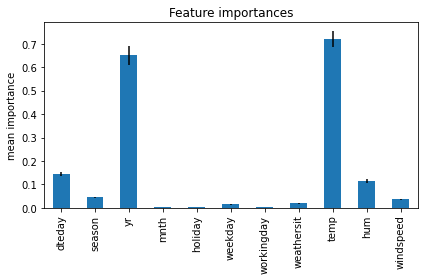

In [4]:
import matplotlib.pyplot as plt

feature_names = list(data.drop("cnt", axis=1))

imp_mean = r["importances_mean"]
imp_std =r["importances_std"]

forest_importances = pd.Series(imp_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=imp_std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("mean importance")
fig.tight_layout()

### Points for discussion:

- Mean Importance Values do not sum up to 1
- year is the most important feature, because buisniss was generally more in the second year of operation
- strongly correlates with temp ... obv cycling is nicer when its warm
- dteday not obvious directly